In [15]:
using Revise
using MDToolbox, PyPlot, Statistics, LinearAlgebra
PyPlot.plt.style.use("seaborn-colorblind")
ENV["COLUMNS"] = 110; #display width for MDToolbox

-----

In [16]:
pdb_xtal = readpdb("/data/higashi/new_4krn/ALL_gREST_4KRN/ground_truth.pdb");

#pdb_init = readpdb("/data/higashi/new_4krn/LJ_gREST_4KRN/prot.pdb");
pdb_init = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/prot.pdb");
ta1 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all.nc");
#ta1 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param1.dcd");
#ta2 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/08_remd_convert/run_param1.dcd", isbox=false);
#ta3 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/09_remd_convert/run_param1.dcd", isbox=false);
#ta4 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/10_remd_convert/run_param1.dcd", isbox=false);
#ta5 = readdcd("/data/yasu/vhh_grest/grest_4krn_swissmodel/11_remd_convert/run_param1.dcd", isbox=false);
#ta = [pdb_init; ta1; ta2; ta3; ta4; ta5];
#ta = [pdb_init; ta1; ta2; ta3; ta4];
ta = [pdb_init; ta1]

13001x1987 TrjArray{Float64, Int64}
|                            |                            |  …                              |
| 1GLN                       | 1GLN                       |  …   129SER                     |
| 1N                         | 2HT1                       |  …   1987HT3                    |
|    15.20    -9.22    -8.26 |    15.15    -9.02    -7.24 |  …     -25.14     1.08    -0.68 |
|    14.57   -15.28    -8.64 |    13.86   -15.41    -9.39 |        -21.45     4.00   -10.88 |
|    11.01   -20.42   -21.69 |    11.35   -21.32   -21.31 |        -20.70    -4.52    -1.70 |
|     7.81   -23.02   -21.95 |     7.96   -23.94   -21.48 |        -21.18    -1.56    -1.77 |
|     9.46   -20.76   -20.74 |     8.82   -20.13   -21.26 |        -18.68    -1.22     1.22 |
|     8.77   -22.94   -20.16 |     8.01   -22.24   -20.08 |  …     -19.51    -2.55    -0.73 |
|    11.29    -2.55   -24.29 |    11.80    -2.43   -23.38 |        -16.89    11.87     3.09 |
|    11.91   -12.66    -

In [17]:
pdb_xtal = pdb_xtal["(atomname CA) and (resid 100:120)"]
pdb_init = pdb_init["(atomname CA) and (resid 100:120)"]
ta = ta["(atomname CA) and (resid 100:120)"];
#ta = ta["(atomname CA) and (resid 20:125)"];

In [18]:
x_xtal = MDToolbox.compute_distancemap(pdb_xtal);
x_init = MDToolbox.compute_distancemap(pdb_init);

In [19]:
X = MDToolbox.compute_distancemap(ta);

In [20]:
X_mean = mean(X, dims=1)

1×171 Matrix{Float64}:
 9.81901  12.0669  14.1828  15.2526  17.165  16.3193  …  10.2132  10.9309  9.48628  11.1383  7.57618

In [21]:
X .= X .- X_mean
e = eigen(X' * X ./ size(X, 1))
lambda = e.values[end:-1:1]
W = e.vectors[:, end:-1:1]
P = X * W

13001×171 Matrix{Float64}:
 -16.6039   -19.0381    -7.07346   8.53848   -0.482918   …  -0.00392373    0.00170068    0.00164644
 -17.7536   -17.1716    -5.5128    6.80478   -0.0950191     -0.00171885   -0.00182173    0.00152289
 -12.4447   -12.6979     6.17738   5.5497     4.6654         0.00118662   -0.00191055    0.000123027
 -13.4998   -11.7818     4.08767   5.82291    2.99181       -0.00029567   -0.00524161    0.00426125
 -14.2235   -13.6767     4.53869   4.9688     4.12991        0.00212959   -0.00544552    0.00419884
 -14.0727   -12.8484     5.44988   6.92492    4.08068    …  -0.00164736   -0.00360165    0.00205258
  -3.40553  -21.2449   -12.2217   16.4885    -5.86351        0.0188695     0.000559165   0.000607918
 -19.3054   -15.8567    -4.1389    4.10311    0.631108       0.00562847    0.00358191    0.000139689
 -12.7285   -12.3667     6.04218   8.06825    5.04112       -0.00557721   -0.00251651   -0.00183282
 -20.8542   -17.8789    -4.67977   3.04443   -0.933483      -0.0061192

In [22]:
p_xtal = (x_xtal .- X_mean) * W
p_init = (x_init .- X_mean) * W

1×171 Matrix{Float64}:
 -16.6039  -19.0381  -7.07346  8.53848  -0.482918  …  -0.0132968  -0.00392373  0.00170068  0.00164644

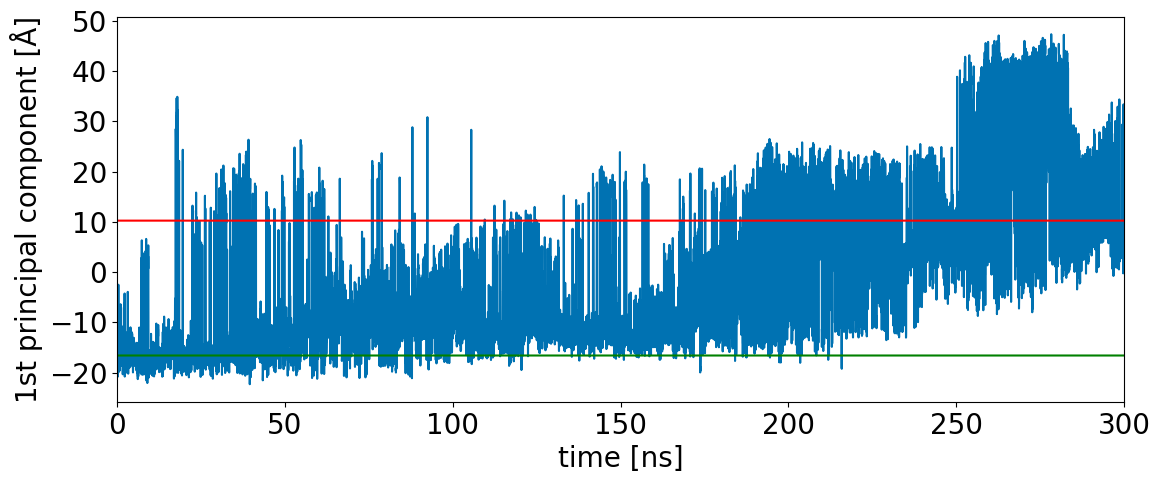

In [23]:
#fig, ax = subplots(figsize=(13, 5));
figure(figsize=(13,5),)
plot((1:size(P, 1)).*0.25*0.1, P[:, 1])
plot((1:size(P, 1)).*0.25*0.1, ones(size(P,1))*p_xtal[1], color=:red)
plot((1:size(P, 1)).*0.25*0.1, ones(size(P,1))*p_init[1], color=:green)
#ax[:set_xlim]([0,100])
xlim([0, 300])
ylabel("1st principal component [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
xticks(fontsize=20);
yticks(fontsize=20);
savefig("timeseries_grest.png", dpi=350, bbox_inches="tight");

In [24]:
P

13001×171 Matrix{Float64}:
 -16.6039   -19.0381    -7.07346   8.53848   -0.482918   …  -0.00392373    0.00170068    0.00164644
 -17.7536   -17.1716    -5.5128    6.80478   -0.0950191     -0.00171885   -0.00182173    0.00152289
 -12.4447   -12.6979     6.17738   5.5497     4.6654         0.00118662   -0.00191055    0.000123027
 -13.4998   -11.7818     4.08767   5.82291    2.99181       -0.00029567   -0.00524161    0.00426125
 -14.2235   -13.6767     4.53869   4.9688     4.12991        0.00212959   -0.00544552    0.00419884
 -14.0727   -12.8484     5.44988   6.92492    4.08068    …  -0.00164736   -0.00360165    0.00205258
  -3.40553  -21.2449   -12.2217   16.4885    -5.86351        0.0188695     0.000559165   0.000607918
 -19.3054   -15.8567    -4.1389    4.10311    0.631108       0.00562847    0.00358191    0.000139689
 -12.7285   -12.3667     6.04218   8.06825    5.04112       -0.00557721   -0.00251651   -0.00183282
 -20.8542   -17.8789    -4.67977   3.04443   -0.933483      -0.0061192

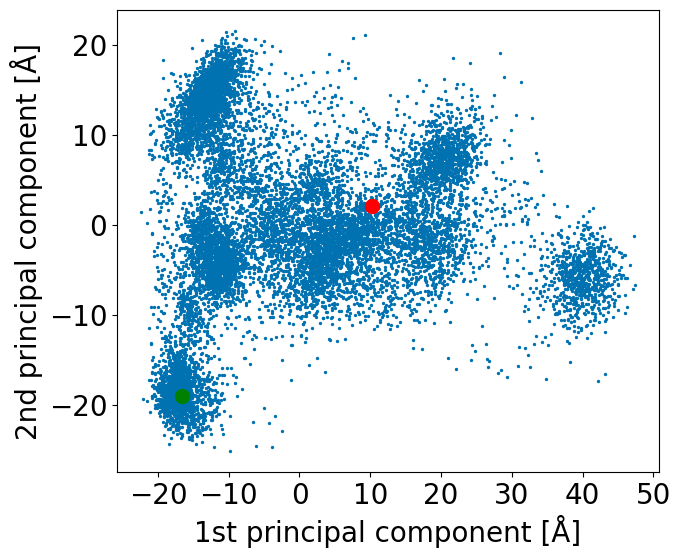

In [25]:
fig, ax = subplots(figsize=(7, 6));
ax.scatter(P[:, 1], P[:, 2], s=2.0);
ax.scatter(p_xtal[1], p_xtal[2], s=100.0, color=:red);
ax.scatter(p_init[1, 1], p_init[1, 2], s=100.0, color=:green);
xlabel("1st principal component [Å]",fontsize=20);
ylabel("2nd principal component [Å]",fontsize=20);

# detailed options (not necessary, just for reference)
#ax.set(xlim=[-20, 10], ylim=[-10, 15]);
#ax.xaxis.set_tick_params(which="major",labelsize=15);
#ax.yaxis.set_tick_params(which="major",labelsize=15);
#ax.grid(linestyle="--", linewidth=0.5);
#tight_layout();

xticks(fontsize=20);
yticks(fontsize=20);

savefig("scatter_grest.png", dpi=350);

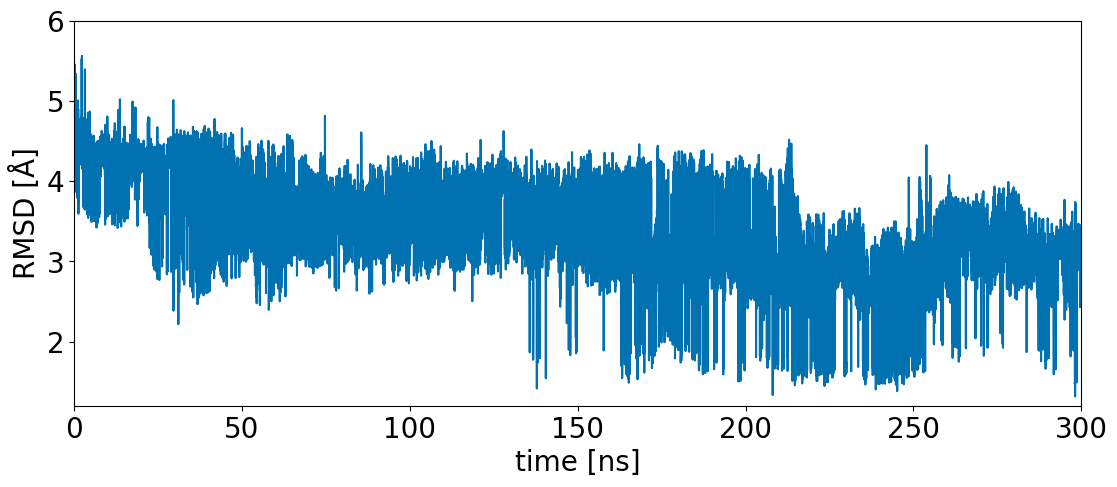

In [26]:
figure(figsize=(13,5),)
ta_fitted = superimpose(pdb_xtal, ta);
rmsd = compute_rmsd(pdb_xtal, ta_fitted)
plot((1:size(P, 1)).*0.25*0.1, rmsd)
xticks(fontsize=20);
yticks(fontsize=20);
ylabel("RMSD [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
ylim([1.2, 6])
#ylim([1.5, 6.5])
xlim([0, 300])
savefig("rmsd.png", dpi=350, bbox_inches="tight");

In [51]:
s1 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_1.ene")
s2 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_2.ene")
s3 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_3.ene")
s4 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_4.ene")
s5 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_5.ene")
s6 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_6.ene")
s7 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_7.ene")
s8 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/all_8.ene")

1300143-element Vector{String}:
 "# Column   1: STEP"
 "# Column   2: POTENTIAL ENERGY of  1-th parameter"
 "# Column   3: POTENTIAL ENERGY of  2-th parameter"
 "# Column   4: POTENTIAL ENERGY of  3-th parameter"
 "# Column   5: POTENTIAL ENERGY of  4-th parameter"
 "# Column   6: POTENTIAL ENERGY of  5-th parameter"
 "# Column   7: POTENTIAL ENERGY of  6-th parameter"
 "# Column   8: POTENTIAL ENERGY of  7-th parameter"
 "# Column   9: POTENTIAL ENERGY of  8-th parameter"
 "# unit of output energy is kcal/mol"
 "#"
 "             100       -80635.1899     -80596.2238     -80560.0211     -80525.2844     -80493.2356     -80459.3055     -80425.8538     -80393.0335"
 "             200       -80631.8161     -80592.6493     -80556.2785     -80521.3973     -80489.2296     -80455.1891     -80421.6441     -80388.7470"
 ⋮
 "         9998900       -80489.1600     -80458.6163     -80430.0343     -80402.4232     -80376.7856     -80349.4720     -80322.3700     -80295.6109"
 "         9999000       

In [46]:
N = 13000 #100000 dihed3000 トラジェクトリファイルのフレーム数
STEP = zeros(Int,N)
ENERGY_1 = zeros(Float32,N)
ENERGY_2 = zeros(Float32,N)
ENERGY_3 = zeros(Float32,N)
ENERGY_4 = zeros(Float32,N)
ENERGY_5 = zeros(Float32,N)
ENERGY_6 = zeros(Float32,N)
ENERGY_7 = zeros(Float32,N)
ENERGY_8 = zeros(Float32,N)

13000-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [47]:
k = 0
for i = 1:length(s1) #iは全体のエネルギーの探索
    if endswith(s1[i],"#") #ここからはじまり
        for j = 1:1000 #N #jは10000000ステップの中での探索(エネルギーは100ステップおきに出力)　このエネルギーを1000でストライドしたトラジェクトリに対応するように抽出していく
            k = k + 1
            STEP[k] = parse(Int,s1[i+j*100][8:14])               #最も左のカラム
            ENERGY_1[k] = log(-parse(Float32,s1[i+j*10][23:34]))      #左から2番目のカラム
            #ENERGY_2[k] = log(-parse(Float32,s[i+j*10][39:50]))      #左から3番目のカラム
            #ENERGY_3[k] = log(-parse(Float32,s[i+j*10][55:66]))      #左から4番目のカラム
            #ENERGY_4[k] = log(-parse(Float32,s[i+j*10][71:82]))      #左から5番目のカラム
            #ENERGY_5[k] = log(-parse(Float32,s[i+j*10][87:98]))      #左から6番目のカラム
            #ENERGY_6[k] = log(-parse(Float32,s[i+j*10][103:114]))    #左から7番目のカラム
            #ENERGY_7[k] = log(-parse(Float32,s[i+j*10][119:130]))    #左から8番目のカラム
            #ENERGY_8[k] = log(-parse(Float32,s[i+j*10][135:146]))    #左から9番目のカラム
                        
            ENERGY_2[k] = log(-parse(Float32,s2[i+j*10][23:34]))
            ENERGY_3[k] = log(-parse(Float32,s3[i+j*10][23:34]))
            ENERGY_4[k] = log(-parse(Float32,s4[i+j*10][23:34]))
            ENERGY_5[k] = log(-parse(Float32,s5[i+j*10][23:34]))
            ENERGY_6[k] = log(-parse(Float32,s6[i+j*10][23:34]))
            ENERGY_7[k] = log(-parse(Float32,s7[i+j*10][23:34]))
            ENERGY_8[k] = log(-parse(Float32,s8[i+j*10][23:34]))
        end
    end
end


In [52]:
k = 0
for i = 1:length(s1) #iは全体のエネルギーの探索
    if startswith(s1[i]," --------------- --------------- --------------- --------------- ---------------") #ここからはじまり
        for j = 1:1000 #N #jは10000000ステップの中での探索(エネルギーは100ステップおきに出力)　このエネルギーを100でストライドしたトラジェクトリに対応させる
            k = k + 1
            STEP[k] = parse(Int,s1[i+j*200-1][8:16])     
            ENERGY_1[k] = log(-parse(Float32,s1[i+j*200-1][53:64])) 
            ENERGY_2[k] = log(-parse(Float32,s2[i+j*200-1][53:64])) 
            ENERGY_3[k] = log(-parse(Float32,s3[i+j*200-1][53:64])) 
            ENERGY_4[k] = log(-parse(Float32,s4[i+j*200-1][53:64])) 
            ENERGY_5[k] = log(-parse(Float32,s5[i+j*200-1][53:64])) 
            ENERGY_6[k] = log(-parse(Float32,s6[i+j*200-1][53:64])) 
            ENERGY_7[k] = log(-parse(Float32,s7[i+j*200-1][53:64])) 
            ENERGY_8[k] = log(-parse(Float32,s8[i+j*200-1][53:64])) 
        end
    end
end

In [53]:
ENERGY_3

13000-element Vector{Float32}:
 11.297866
 11.295836
 11.298211
 11.298344
 11.297338
 11.295728
 11.296199
 11.297184
 11.298074
 11.297601
 11.295472
 11.297432
 11.296792
  ⋮
 11.299042
 11.297785
 11.29694
 11.297201
 11.298725
 11.296874
 11.296022
 11.296606
 11.297002
 11.296794
 11.296862
 11.296215

In [49]:
rmsd_N = zeros(Float32,N) #zeros(Float32,N)
for i = 1:N #10000 #N
    rmsd_N[i] = rmsd[i]
end

In [55]:
pdb_xtal = readpdb("/data/higashi/new_4krn/ALL_gREST_4KRN/ground_truth.pdb");
pdb_xtal = pdb_xtal["(atomname CA) and (resid 100:120)"];
pdb_init = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/prot.pdb");

ta1 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param1_all_s100.dcd");
ta2 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param2_all_s100.dcd");
ta3 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param3_all_s100.dcd");
ta4 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param4_all_s100.dcd");
ta5 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param5_all_s100.dcd");
ta6 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param6_all_s100.dcd");
ta7 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param7_all_s100.dcd");
ta8 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param8_all_s100.dcd");

TA1 = [pdb_init; ta1]
TA1 = TA1["(atomname CA) and (resid 100:120)"]
ta_fitted_1 = superimpose(pdb_xtal, TA1);
rmsd1 = compute_rmsd(pdb_xtal, ta_fitted_1)

TA2 = [pdb_init; ta2]
TA2 = TA2["(atomname CA) and (resid 100:120)"]
ta_fitted_2 = superimpose(pdb_xtal, TA2);
rmsd2 = compute_rmsd(pdb_xtal, ta_fitted_2)

TA3 = [pdb_init; ta3]
TA3 = TA3["(atomname CA) and (resid 100:120)"]
ta_fitted_3 = superimpose(pdb_xtal, TA3);
rmsd3 = compute_rmsd(pdb_xtal, ta_fitted_3)

TA4 = [pdb_init; ta4]
TA4 = TA4["(atomname CA) and (resid 100:120)"]
ta_fitted_4 = superimpose(pdb_xtal, TA4);
rmsd4 = compute_rmsd(pdb_xtal, ta_fitted_4)

TA5 = [pdb_init; ta5]
TA5 = TA5["(atomname CA) and (resid 100:120)"]
ta_fitted_5 = superimpose(pdb_xtal, TA5);
rmsd5 = compute_rmsd(pdb_xtal, ta_fitted_5)

TA6 = [pdb_init; ta6]
TA6 = TA6["(atomname CA) and (resid 100:120)"]
ta_fitted_6 = superimpose(pdb_xtal, TA6);
rmsd6 = compute_rmsd(pdb_xtal, ta_fitted_6)

TA7 = [pdb_init; ta7]
TA7 = TA7["(atomname CA) and (resid 100:120)"]
ta_fitted_7 = superimpose(pdb_xtal, TA7);
rmsd7 = compute_rmsd(pdb_xtal, ta_fitted_7)

TA8 = [pdb_init; ta8]
TA8 = TA8["(atomname CA) and (resid 100:120)"]
ta_fitted_8 = superimpose(pdb_xtal, TA8);
rmsd8 = compute_rmsd(pdb_xtal, ta_fitted_8)

LoadError: ArgumentError: number of atoms doesn't match

In [54]:
rmsd_N_1 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_2 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_3 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_4 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_5 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_6 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_7 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_8 = zeros(Float32,N) #zeros(Float32,N)

for i = 1:N #サイズ合わせる
    rmsd_N_1[i] = rmsd1[i]
    rmsd_N_2[i] = rmsd2[i]
    rmsd_N_3[i] = rmsd3[i]
    rmsd_N_4[i] = rmsd4[i]
    rmsd_N_5[i] = rmsd5[i]
    rmsd_N_6[i] = rmsd6[i]
    rmsd_N_7[i] = rmsd7[i]
    rmsd_N_8[i] = rmsd8[i]
end

LoadError: UndefVarError: rmsd1 not defined

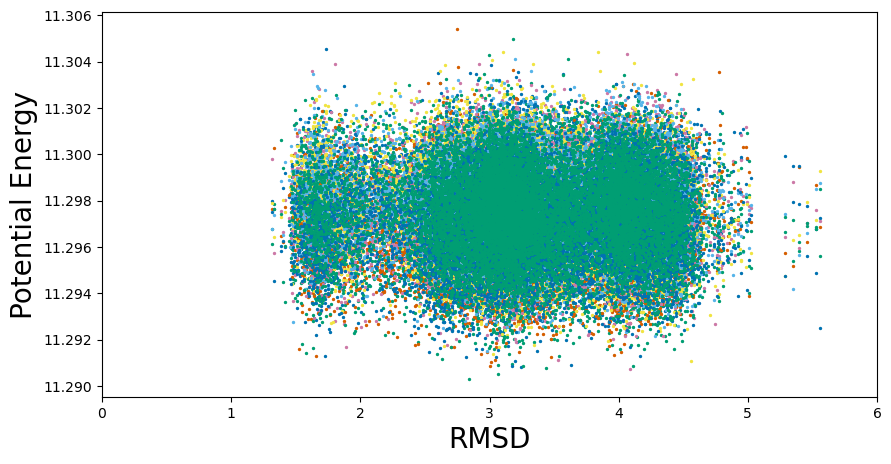

In [50]:
fig, ax = subplots(figsize=(10, 5));
ax.scatter(rmsd_N,ENERGY_1, s=2.0);
ax.scatter(rmsd_N,ENERGY_2, s=2.0);
ax.scatter(rmsd_N,ENERGY_3, s=2.0);
ax.scatter(rmsd_N,ENERGY_4, s=2.0);
ax.scatter(rmsd_N,ENERGY_5, s=2.0);
ax.scatter(rmsd_N,ENERGY_6, s=2.0);
ax.scatter(rmsd_N,ENERGY_7, s=2.0);
ax.scatter(rmsd_N,ENERGY_8, s=2.0);
xlim([0, 6])
#ylim([-82000, -79100])
xlabel("RMSD",fontsize=20);
ylabel("Potential Energy",fontsize=20);
xticks(fontsize=10);
yticks(fontsize=10);

#savefig("ene_RMSD_4krnALL.png", dpi=350, bbox_inches="tight");